# Последовательность Фибоначчи

In [1]:
def fibonacci(sequence_length):
    sequence = [0,1]
    if sequence_length < 1:
        print ("Последовательность Фибоначи не может иметь длину, меньшую 1.")
        return
    if 0 < sequence_length < 3:
        return sequence[0:sequence_length]
    for i in range(2,sequence_length):
        sequence.append(sequence[i-1]+sequence[i-2])
    return sequence

In [2]:
fibonacci(12)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

fibonacci(2)

In [3]:
fibonacci(0)

Последовательность Фибоначи не может иметь длину, меньшую 1.


# Бриллианты

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Читаем файл "p1_бриллианты.csv"*** 

In [5]:
data = pd.read_csv('p1_diamonds.csv')

***Удаление Unnamed столбца, axis = 1 означает, что мы удаляем столбец***

In [6]:
data = data.drop(['Unnamed: 0'], axis = 1)

***Выводим первые строки файла***

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Графики

***Берём данные из поля "price"***

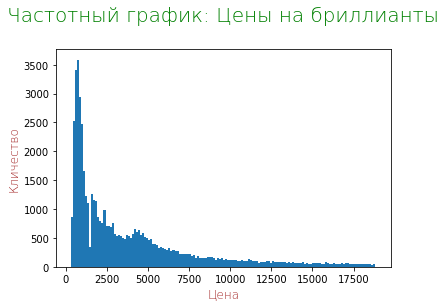

In [8]:
plt.hist(data["price"], bins = 150)

# Добавляем заголовок
plt.title("Частотный график: Цены на бриллианты\n", fontdict={'fontsize': 20, 'fontweight': 20, 'color': 'Green'})

# Делаем наименование осей
plt.xlabel("Цена", fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})
plt.ylabel("Кличество", fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})
                                  
# Выводим график
plt.show()


***Сгруппируем данные по огранке бриллиантов***

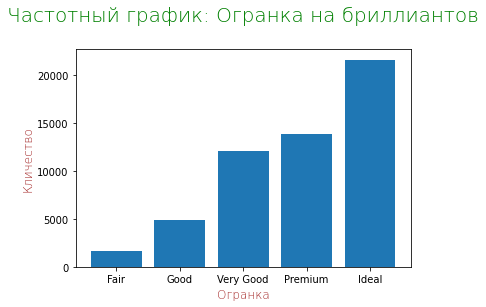

In [9]:
groupdata = data.groupby("cut").count()
groupdata

x_vals = []
y_vals = []
for i in [0, 1, 4, 3, 2]:
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])
    
plt.bar(x_vals, y_vals)

# Добавляем заголовок
plt.title("Частотный график: Огранка на бриллиантов\n", fontdict={'fontsize': 20, 'fontweight': 20, 'color': 'Green'})

# Делаем наименование осей
plt.xlabel("Огранка", fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})
plt.ylabel("Кличество", fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})

# Выводим график
plt.show()

# Машинное обучение. Библиотека scikit-learn

***y = x1 + 2*x2 + 3*x3***

In [10]:
from random import randint
from sklearn.linear_model import LinearRegression

***Создание тренировочного набора данных***

In [11]:
train_set_limit = 1000
train_set_count = 100

train_input = list()
train_output = list()
for i in range(train_set_count):
    a = randint(0, train_set_limit)
    b = randint(0, train_set_limit)
    c = randint(0, train_set_limit)
    op = a + (2*b) + (3*c)
    train_input.append([a, b, c])
    train_output.append(op)
    
for i in range(20):
    print(train_input[i], train_output[i])

[263, 728, 66] 1917
[1000, 165, 323] 2299
[132, 360, 239] 1569
[776, 79, 757] 3205
[176, 242, 524] 2232
[808, 471, 514] 3292
[3, 579, 72] 1377
[806, 578, 498] 3456
[170, 149, 752] 2724
[756, 243, 450] 2592
[166, 878, 385] 3077
[577, 768, 4] 2125
[612, 450, 385] 2667
[715, 520, 586] 3513
[230, 371, 88] 1236
[865, 20, 894] 3587
[543, 12, 290] 1437
[61, 31, 251] 876
[198, 909, 656] 3984
[12, 27, 393] 1245


***Тренировка***

In [12]:
predictor = LinearRegression()
predictor.fit(X=train_input, y=train_output)

LinearRegression()

***Прогнозирование***

In [13]:
x_test = [[18, 46, 72]]
outcome = predictor.predict(X=x_test)
coefficients = predictor.coef_

print('Outcome : ', outcome)
print('Coefficients : ', coefficients)

Outcome :  [326.]
Coefficients :  [1. 2. 3.]
